* [Introduction](#introduction)
* [Data Cleaning](#data-cleaning), prepared by [Jatin](https://www.kaggle.com/jkanthony)
* [Modeling](#modeling)
    - [Model 1](#model-1), based on characteristics of the song
    - [Model 2](#model-2), unification of the target value
    - [Model 3](#model-3), additional feature
* [Comparision of the models](#comparision)

<a id="introduction"></a>

## Introduction


**Spotify top songs** data set contains information about top 100 songs on Spotify between 2010 and 2019. Descriptors of each songs are as follow:
* song's **title**
* **artist**
* **genre**
* **year released**
* day, **when it was added** to Spotify
* bpm - **beats per minute**, tempo
* nrgy - **energy** of the song
* dnc - **danceability**
* db - **loudness**
* live - whether it's **live recording**
* val - **positivity** of the mood of the song
* **duration** of the song
* whether the song is **acoustic**
* whether it's **focused on spoken word**
* **popularity**
* year, **when it was on top**
* **artist type**

Data set was aggregated by [@Michael Morris](https://www.kaggle.com/muhmores) and later fixed/prepared by [@Jatin](https://www.kaggle.com/jkanthony). 

The project I have designed based on work of Michael and Jatin contains **k-nearest neighbours models, that try to predict genre of the song using above mentioned features.**

<a id="data-cleaning"></a>
## Data Cleaning

Removal of empty rows and correcting accuracy of data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

Data is first loaded and presented below. It contains all of the variables named in the introduction, has 1003 rows and 17 columns.

In [2]:
df = pd.read_csv('../input/spotify-top-100-songs-of-20152019/Spotify 2010 - 2019 Top 100.csv')
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Code reveals that last three rows are full of NaN values. Below we investigate further, whether there are more of such data points.

In [3]:
df.isnull().sum()

title            3
artist           3
top genre        3
year released    3
added            3
bpm              3
nrgy             3
dnce             3
dB               3
live             3
val              3
dur              3
acous            3
spch             3
pop              3
top year         3
artist type      3
dtype: int64

Only three bottom rows are wrong and therefore deleted.

In [4]:
df = df.iloc[0:999]

<a id="modeling"></a>
## Modeling

Creating K-NearestNeighbours models in order to predict song's genre

<a id="model-1"></a>
## Model 1 - based on songs characteristics


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

### Preparation of the data

In [6]:
#Indicating features (characteristics of the song) and target values for model 1
m1_features = pd.DataFrame(df, columns = ["bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch", "pop"])
m1_target = pd.DataFrame(df["top genre"])

In [7]:
#Spliting the data into the train and test part (ratio 750:250)
X1_train, X1_test, y1_train, y1_test = train_test_split(m1_features, m1_target, random_state = 1)

### Creating the model

In [8]:
#Creating k-nearest neighbours model
knn_m1 = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn_m1.fit(X1_train, y1_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

### Prediction

In [9]:
#Predicting the values for test data, using the knn_m1 model
y1_pred = knn_m1.predict(X1_test)

### Evaluation

In [10]:
#Evaluation
m1_true = pd.DataFrame(df.loc[X1_test.index, "top genre"]).reset_index(drop=True)
m1_compare = pd.concat([m1_true, pd.DataFrame(y1_pred)], axis = 1)
m1_compare = pd.concat([m1_compare, m1_compare["top genre"] == m1_compare[0]], axis = 1)
m1_compare.columns = ["top genre org", "top genre pred", "validation"]

In [11]:
m1_compare

,top genre org,top genre pred,validation
0,detroit hip hop,alternative dance,False
1,alt z,dance pop,False
2,pop,dance pop,False
3,dance pop,dance pop,True
4,canadian pop,dance pop,False
...,...,...,...
245,deep disco house,dance pop,False
246,canadian contemporary r&b,dance pop,False
247,dance pop,dance pop,True
248,romanian house,dance pop,False


Evaluating accuracy of the model - ratio between the amount of correctly predicted values and all values

In [55]:
m1_val = list(m1_compare["validation"]).count(True)/(list(m1_compare["validation"]).count(False) + list(m1_compare["validation"]).count(True))
m1_val

0.312

31% of cases were assigned correctly, which is rather small value. Following models try to have a better outcome. 

<a id="model-2"></a>
## Model 2 - unification of the target value

After exploring the unique values in "top genre" column, it was concluded that most of the genres are described in much detail, e.g. australian pop. Following dictionary unifies the values and detailed description is swapped with general genre.

In [13]:
df["top genre"].unique()

array(['dance pop', 'pop soul', 'atl hip hop', 'pop rap', 'big room',
       'canadian hip hop', 'disco house', 'romanian house', 'lilith',
       'detroit hip hop', 'asian american hip hop', 'east coast hip hop',
       'neo mellow', 'canadian pop', 'reggae fusion', 'idol', 'art pop',
       'hip hop', 'pop', 'talent show', 'modern alternative rock',
       'indietronica', 'grime', 'barbadian pop', 'acoustic pop',
       'dutch house', 'belgian pop', 'contemporary country', 'boy band',
       'celtic rock', 'edm', 'indie rock', 'australian dance',
       'british soul', 'eau claire indie', 'dancefloor dnb',
       'permanent wave', 'hip pop', 'g funk', 'baroque pop', 'indie pop',
       'chicago rap', 'indie poptimism', 'french shoegaze',
       'alternative metal', 'indie folk', 'alternative rock',
       'uk hip hop', 'electro house', 'garage rock', 'israeli pop',
       'alternative r&b', 'australian pop', 'candy pop', 'modern rock',
       'conscious hip hop', 'folk-pop', 'alterna

In [14]:
genre_dict = {
    "dance pop" : "pop", 
    "pop soul" : "soul",
    "atl hip hop" : "hip hop",
    "pop rap" : "rap",
    "big room" : "house",
    "canadian hip hop" : "hip hop",
    "disco house" : "house",
    "romanian house" : "house",
    'lilith' : "indie",
    'detroit hip hop' : "hip hop", 
    'asian american hip hop' : "hip hop", 
    'east coast hip hop': "hip hop",
    'neo mellow' : "pop", 
    'canadian pop' : "pop", 
    'reggae fusion' : "reggae", 
    'idol' : "pop", 
    'art pop' : "pop",
    "talent show" : "pop", 
    'modern alternative rock' : "rock",
    'indietronica' : "electronic", 
    'grime' : "hip hop", 
    'barbadian pop' : "pop", 
    'acoustic pop' : "pop",
    'dutch house' : "house", 
    'belgian pop' : "pop", 
    'contemporary country' : "country", 
    'boy band' : "pop",
    'celtic rock' : "rock", 
    'edm' : "electronic", 
    'indie rock' : "indie", 
    'australian dance' : "dance",
    'british soul' : "soul", 
    'eau claire indie' : "indie", 
    'dancefloor dnb' : "dance",
    'permanent wave' : "rock", 
    'hip pop' : "pop", 
    'g funk' : "funk", 
    'baroque pop' : "pop", 
    'indie pop' : "pop",
    'chicago rap' : "rap", 
    'indie poptimism' : "indie", 
    'french shoegaze' : "rock",
    'alternative metal' : "metal", 
    'indie folk' : "indie", 
    'alternative rock' : "rock",
    'uk hip hop' : "hip hop", 
    'electro house' : "house", 
    'garage rock' : "rock", 
    'israeli pop' : "pop",
    'alternative r&b' : "r&b", 
    'australian pop' : "pop", 
    'candy pop' : "pop", 
    'modern rock' : "rock",
    'conscious hip hop' : "hip hop", 
    'folk-pop' : "pop", 
    'alternative dance' : "dance", 
    'k-pop' : "pop",
    'gangster rap' : "rap", 
    'brostep' : "dance", 
    'downtempo' : "pop", 
    'la indie' : "indie", 
    'bass trap' : "dance",
    'metropopolis' : "pop", 
    'electropop' : "pop", 
    'electro' : "electronica", 
    'destroy techno' : "dance", 
    'emo' : "rock",
    'austrian pop' : "pop", 
    'irish pop' : "pop", 
    'adult standards' : "pop", 
    'modern folk rock' : "rock",
    'tropical house' : "house", 
    'contemporary r&b' : "r&b", 
    'deep disco house' : "house",
    'bubblegum dance' : "dance", 
    'chill pop' : "pop", 
    'comic' : "pop", 
    'complextro' : "electronica", 
    'nyc rap' : "rap",
    'deep groove house' : "house", 
    'australian hip hop' : "hip hop", 
    'neo soul' : "soul",
    'deep house' : "house", 
    'french indie pop' : "pop", 
    'german pop' : "pop", 
    'dutch hip hop' : "hip hop",
    'aussietronica' : "electronica", 
    'australian indie' : "indie", 
    'canadian contemporary r&b' : "r&b",
    'kentucky hip hop' : "hip hop", 
    'new jersey rap' : "rap", 
    'irish singer-songwriter' : "pop",
    'ghanaian hip hop' : "hip hop", 
    'icelandic indie' : "indie", 
    'indie pop rap' : "pop",
    'new french touch' : "pop", 
    'san diego rap' : "rap", 
    'australian psych' : "rock",
    'canadian indie' : "indie", 
    'alt z' : "pop", 
    'danish pop' : "pop", 
    'melodic rap' : "rap",
    'social media pop' : "pop", 
    'london rap' : "rap", 
    'florida rap' : "rap", 
    'emo rap' : "rap",
    'latin' : "dance", 
    'ohio hip hop' : "hip hop", 
    'dfw rap' : "rap", 
    'hawaiian hip hop' : "hio hop",
    'dirty south rap' : "rap", 
    'afroswing' : "swing", 
    'basshall' : "dance", 
    'memphis hip hop' : "hip hop",
    'bedroom pop' : "pop", 
    'hollywood' : "pop", 
    'afrofuturism' : "pop", 
    'comedy rap' : "rap",
    'colombian pop' : "pop", 
    'cali rap' : "rap", 
    'black americana' : "pop",
    'north carolina hip hop' : "hip hop", 
    'alternative pop rock' : "pop", 
    'dark clubbing' : "dance",
    'lgbtq+ hip hop' : "hip hop", 
    'afro dancehall' : "dance", 
    'argentine hip hop' : "hip hop",
    'classic rock' : "rock", 
    'uk drill' : "hip hop"}

In [19]:
for key, value in genre_dict.items():
    df["top genre"].replace(key, value, inplace = True)

In [20]:
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,2019.0,2020‑06‑22,85.0,67.0,77.0,-6.0,6.0,71.0,171.0,1.0,6.0,81.0,2019.0,Solo
995,SICKO MODE,Travis Scott,hip hop,2018.0,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019.0,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019.0,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019.0,Solo
997,Boasty (feat. Idris Elba),Wiley,hip hop,2019.0,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019.0,Solo


Such corrected target value column creates an opportunity to try the modelling one more time and investigating, whether the unification improved the overall performance of the prediction.

In [27]:
m2_features

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0
1,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0
2,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0
3,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0
4,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0
...,...,...,...,...,...,...,...,...,...,...
994,85.0,67.0,77.0,-6.0,6.0,71.0,171.0,1.0,6.0,81.0
995,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0
996,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0
997,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0


In [29]:
#Indicating features (characteristics of the song) and target values (generalized) for model 2
m2_features = pd.DataFrame(df, columns = ["bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch", "pop"])
m2_target = pd.DataFrame(df["top genre"])

#Spliting the data into the train and test part (ratio 750:250)
X2_train, X2_test, y2_train, y2_test = train_test_split(m2_features, m2_target, random_state = 1)

#Creating k-nearest neighbours model
knn_m2 = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
#Predicting the values for test data, using the knn_m1 model
knn_m2.fit(X2_train, y2_train)
y2_pred = knn_m2.predict(X2_test)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Evaluation

In [31]:
y2_true = pd.DataFrame(df.loc[X2_test.index, "top genre"]).reset_index(drop=True)
m2_compare = pd.concat([y2_true, pd.DataFrame(y2_pred)], axis = 1)
m2_compare = pd.concat([m2_compare, m2_compare["top genre"] == m2_compare[0]], axis = 1)
m2_compare.columns = ["top genre org", "top genre pred", "validation"]

In [35]:
m2_compare

,top genre org,top genre pred,validation
0,hip hop,pop,False
1,pop,pop,True
2,pop,pop,True
3,pop,pop,True
4,pop,pop,True
...,...,...,...
245,house,pop,False
246,r&b,pop,False
247,pop,pop,True
248,house,pop,False


In [54]:
m2_val = list(m2_compare["validation"]).count(True)/(list(m2_compare["validation"]).count(False) + list(m2_compare["validation"]).count(True))
m2_val

0.58

Accuracy of 58% is a big progress, it is not satisfactory for me yet though.

<a id="model-3"></a>
## Model 3 - additional feature
Trying to get better results by adding a feature indicating the artist.

Columns *artist* and *artist type* contain categorical values, and therefore must be changed. I have used one hot coding in order to do so.

In [38]:
ohc_features = pd.get_dummies(df[['artist', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop',
       'artist type']])

The table below shows data set with one hot coded values

In [39]:
ohc_features

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,...,artist_blackbear,artist_fun.,artist_girl in red,artist_iann dior,artist_lovelytheband,artist_will.i.am,artist type_Band/Group,artist type_Duo,artist type_Solo,artist type_Trio
0,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,...,0,0,0,0,0,0,0,1,0,0
1,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,...,0,0,0,0,0,0,0,1,0,0
2,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,...,0,0,0,0,0,0,0,0,1,0
3,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,...,0,0,0,0,0,0,0,0,1,0
4,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,85.0,67.0,77.0,-6.0,6.0,71.0,171.0,1.0,6.0,81.0,...,0,0,0,0,0,0,0,0,1,0
995,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,...,0,0,0,0,0,0,0,0,1,0
996,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,...,0,0,0,0,0,0,0,0,1,0
997,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,...,0,0,0,0,0,0,0,0,1,0


With such engineered features let's continue to predict the (generalized as in model 2) top genre 

In [40]:
#Indicating features (characteristics of the song + artist, artist type) and target values (generalized) for model 2
m3_features = pd.DataFrame(ohc_features, columns = ohc_features.columns)
m3_target = pd.DataFrame(df["top genre"])

#Spliting the data into the train and test part (ratio 750:250)
X3_train, X3_test, y3_train, y3_test = train_test_split(m3_features, m3_target, random_state = 1)

In [46]:
#Creating k-nearest neighbours model
knn_m3 = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn_m3.fit(X3_train, y3_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [47]:
#Predicting the values for test data, using the knn_m1 model
y3_pred = knn_m3.predict(X3_test)

## Evaluation

In [49]:
y3_true = pd.DataFrame(df.loc[X3_test.index, "top genre"]).reset_index(drop=True)
m3_compare = pd.concat([y3_true, pd.DataFrame(y3_pred)], axis = 1)
m3_compare.columns = ["top genre org", "top genre pred"]
m3_compare = pd.concat([m3_compare, m3_compare["top genre org"] == m3_compare["top genre pred"]], axis = 1)
m3_compare.columns = ["top genre org", "top genre pred", "validation"]

In [50]:
m3_compare

,top genre org,top genre pred,validation
0,hip hop,pop,False
1,pop,pop,True
2,pop,pop,True
3,pop,pop,True
4,pop,pop,True
...,...,...,...
245,house,pop,False
246,r&b,pop,False
247,pop,pop,True
248,house,pop,False


In [53]:
m3_val = list(m3_compare["validation"]).count(True)/(list(m3_compare["validation"]).count(False) + list(m3_compare["validation"]).count(True))
m3_val

0.58

Surprisingly, the accuracy of model didn't improve. It is maintained on the level of 58%

<a id="comparision"></a>

## Comparision of the models

(0.0, 1.0)

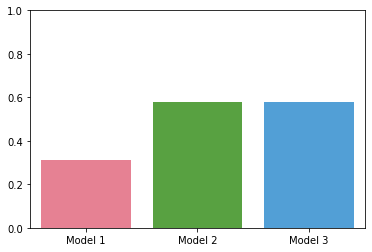

In [67]:
sns.barplot(x = ["Model 1", "Model 2", "Model 3"], y = [m1_val, m2_val, m3_val], palette = "husl").set_ylim(0, 1)